# Affichages des données

Ce notebook regroupe des tests sur l'ensemble des fonctions d'affichages

## Imports

### Librairies

In [2]:
from matplotlib import pyplot as plt

### Autres fichiers

In [3]:
from utils import getSoundAtPosition

## Spectrogramme

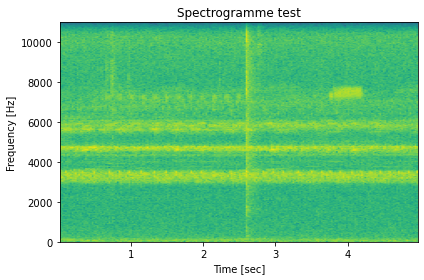

In [4]:
from affichageDonnees import displaySpectrogram

root = './SoundDatabase'
sound, fs = getSoundAtPosition(root, 10, 5)

ax = plt.axes()
displaySpectrogram(sound, fs, "Spectrogramme test", ax)


## Représentation temporelle

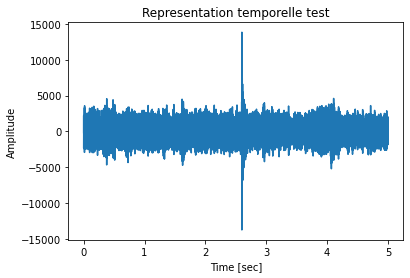

In [5]:
from affichageDonnees import displaySound

root = './SoundDatabase'
sound, fs = getSoundAtPosition(root, 10, 5)

ax = plt.axes()
displaySound(sound, 5, fs, "Representation temporelle test", ax)

## Représentation polaire d'un échantillonnage de sons

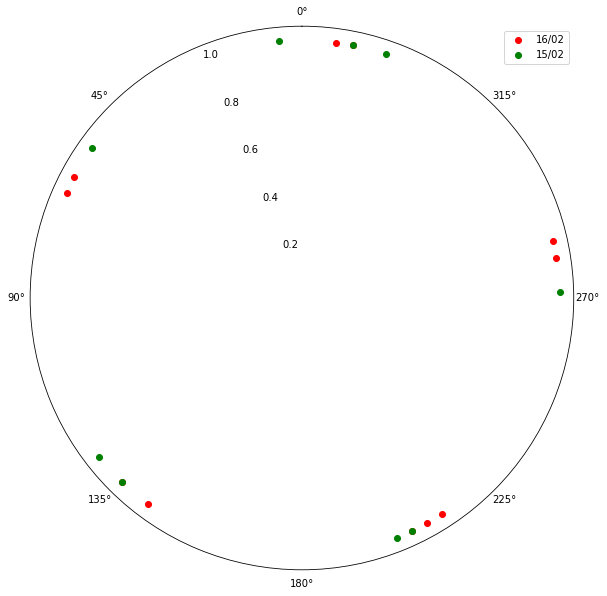

In [6]:
from affichageDonnees import displayPolarSamples
from echantillonages import sampling_pertinence

samples = sampling_pertinence(20)

displayPolarSamples(samples)

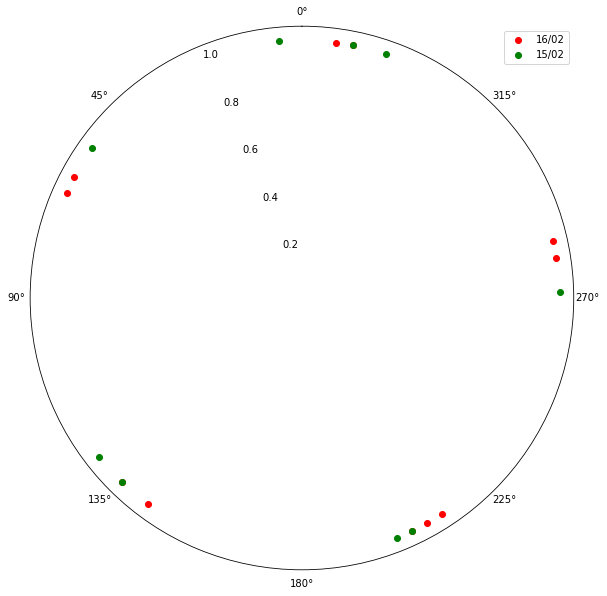

In [7]:
from utils import getDateFromFilename
import numpy as np

def displayPolarSamples(samples):
    nbSamples = len(samples)

    samplesPerDay = {}

    for k, sample in enumerate(samples):

        day, hour = getDateFromFilename(sample, with_year = False).split(" ")
        h, m = hour.split(":")

        time = int(h) * 60 + int(m)

        if not(day in samplesPerDay):
            samplesPerDay[day] = []

        samplesPerDay[day].append(time)
    
    fig = plt.figure(figsize =(10, 10))

    colors = ['r', 'g', 'b']
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_zero_location("N")
    ax.grid(False)
    ax.set_rmax(1)

    for k, day in enumerate(samplesPerDay):
        theta = np.array(samplesPerDay[day]) * 360 / 1440
        ax.plot(theta, np.ones(theta.shape), colors[k] + 'o', label = day)
    
    plt.legend()
    plt.show()


displayPolarSamples(samples)